<a href="https://colab.research.google.com/github/ming80302/Innovator/blob/main/winter_storm_prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot PRISM Dataset

In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install cartopy
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

     |████████████████████████████████| 10.8 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 24.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516277 sha256=f33dc1a2e24f853582053349bfabcdd9155cf418906cfe1a3577d68576ed79d4
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


## 1) Functions defination 

In [ ]:
level_s = np.array([0, 1, 2.5, 5, 7.5, 10, 15, 20,25, 37.5, 50,
         75, 100, 125, 150, 200, 250, 300, 400, 500, 600, 750])

proj = ccrs.PlateCarree()


def ax_coastlines_country(ax_s):
    ax_s.coastlines(linewidths=0.5)
    ax_s.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))

# plot_prec_4
def plot_prec_4(prec, min_v, max_v, cmap_s, colorbar_ori, is_prec):
    # is_prec: use precipitation contour interval
    #fig = plt.figure(figsize=(8,10), dpi=96)
   
    if is_prec=='True':
        ind_max = np.where(level_s==max_v)
        ind_i = int(ind_max[0])
        cnlevel = level_s[:ind_i+1]
    else:
        cnlevel = np.linspace(min_v, max_v, num=11)
  
    for col in range(4):
        ax_s = plt.subplot(2, 2, col+1, projection=proj)
        ax_coastlines_country(ax_s)
        ax_s.add_feature(cfeature.STATES, linestyle=':')
        mem = col + 1

        im=prec[col].plot.contourf(
            levels=cnlevel,
            cmap=cmap_s,
            ax=ax_s,
            transform=proj,
            add_colorbar=False)

        #if is_prec=='True':
            # use np.datetime_as_string to convert numpy.datetime64 to string obj
        plt.title(np.datetime_as_string(prec.coords['time'].values[col], unit='D'),fontweight="bold", size=15)
        #else:
        #    plt.title(prec.coords['day'][col], unit='D'),fontweight="bold", size=15)     
         
    plt.tight_layout()
    # The position of the bottom edge of the subplots, as a fraction of the figure height.
    #fig.subplots_adjust(bottom=0.15)

    #rect [left, bottom, width, height]
    #cbar_ax = fig.add_axes([0.2, 0.1, 0.7, 0.03])
    #fig.colorbar(im, cax=cbar_ax,orientation='horizontal')
    if colorbar_ori=="vertical":
        #rect [left, bottom, width, height]
        cbar_ax = fig.add_axes([0.98, 0.1, 0.04, 0.8])
    else:
        #rect [left, bottom, width, height]
        cbar_ax = fig.add_axes([0.2, 0.001, 0.7, 0.03])
    
    fig.colorbar(im, cax=cbar_ax, orientation=colorbar_ori)

ERA data is loaded from local computer to colab manually On the left hand side, click ">" , click "Files", click Upload.

In [ ]:
### Boundrary
date_s = '2021-02-11'
date_e = '2021-02-14'
lat_s = 34.
lat_e = 48.
lon_s = -125.
lon_e = -115 # -115.

## 2) Pricipitation 

/content/drive/MyDrive/data/PRISM_daily_ppt_2021.nc


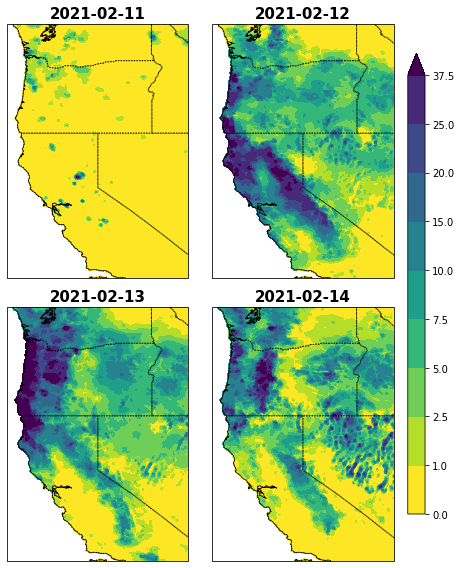

In [ ]:
flnm_prism = '/content/drive/MyDrive/data/PRISM_daily_ppt_2021.nc'
with xr.open_dataset(flnm_prism ) as ds_prism:
  print(flnm_prism)
##### select a range of dates using slice()
prec_t = ds_prism.PR.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e))

fig = plt.figure(figsize=(6,8))
plot_prec_4(prec_t, 1, 37.5,  'viridis_r', 'vertical', 'True') ## 'YlGnBu') 

##3) TMAX

/content/drive/MyDrive/data/PRISM_daily_tmax_2021.nc


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


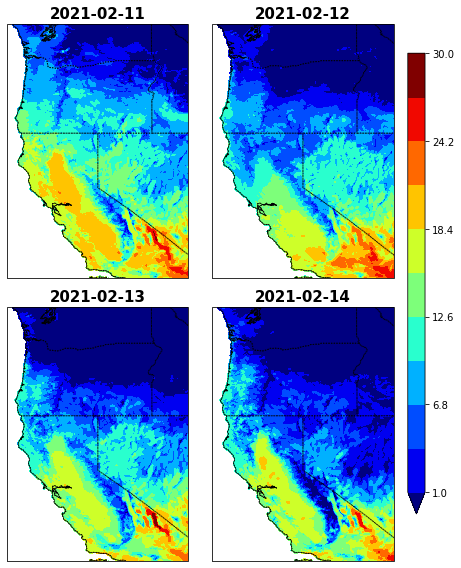

In [ ]:
flnm_prism_tmax = '/content/drive/MyDrive/data/PRISM_daily_tmax_2021.nc'

with xr.open_dataset(flnm_prism_tmax ) as ds_prism_tmax:
  print(flnm_prism_tmax)

tmax_t = ds_prism_tmax.Tmax.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e))

fig = plt.figure(figsize=(6,8))
plot_prec_4(tmax_t, 1, 30,  'jet', 'vertical', 'False') ## 'YlGnBu') 

##4)Tmin


/content/drive/MyDrive/data/PRISM_daily_tmin_2021.nc


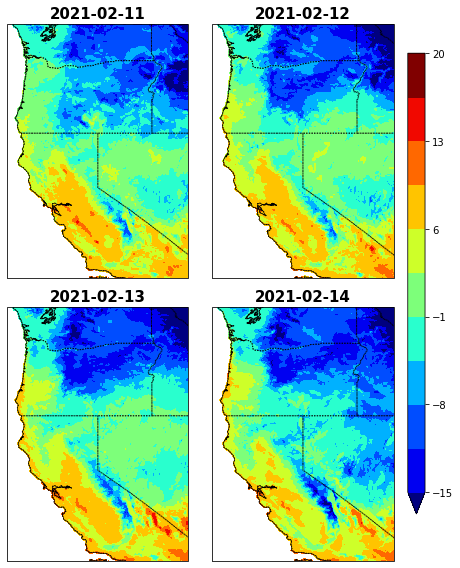

In [ ]:
flnm_prism_tmin = '/content/drive/MyDrive/data/PRISM_daily_tmin_2021.nc'
with xr.open_dataset(flnm_prism_tmin ) as ds_prism_tmin:
  print(flnm_prism_tmin)

tmin_t = ds_prism_tmin.Tmin.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e))

fig = plt.figure(figsize=(6,8))
plot_prec_4(tmin_t, -15, 20,  'jet', 'vertical', 'False') ## 'YlGnBu') 